In [1]:
import sys
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from download import download
import numpy as np
%matplotlib notebook

In [2]:
pd.set_option('display.max_rows', 50000)

In [3]:
df_bikes = pd.read_csv("bicycle_db.csv",
                       na_values="", converters={'data': str, 'heure': str})

C:\Users\cindy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_bikes['heure'] = df_bikes['heure'].replace('', np.nan)
df_bikes.iloc[400:402]

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
400,200500008935,2005-02-13,02 - février,6 - dimanche,NaN,75,75018,0.0,0.0,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,"Dans le couloir bus, dans le même sens",200500008935B01,VL seul,Tournant a droite,1.0
401,200500008941,2005-02-14,02 - février,0 - lundi,15,75,75007,0.0,0.0,oui,...,Casque,Oui,NaN,Véhicule,Avant droit,Sans changement de direction,200500008941A01,VL seul,En s’insérant,1.0


In [5]:
df_bikes.dropna(subset=['heure'], inplace=True)
df_bikes.iloc[399:402]

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
399,200500008875,2005-02-10,02 - février,3 - jeudi,15,75,75016,0.0,0.0,oui,...,NaN,NaN,NaN,Véhicule,Arrière,Sans changement de direction,200500008875B01,Bicyclette,Sans changement de direction,1.0
401,200500008941,2005-02-14,02 - février,0 - lundi,15,75,75007,0.0,0.0,oui,...,Casque,Oui,NaN,Véhicule,Avant droit,Sans changement de direction,200500008941A01,VL seul,En s’insérant,1.0
402,200500008961,2005-02-11,02 - février,4 - vendredi,12,75,75005,0.0,0.0,oui,...,Casque,Oui,NaN,Véhicule,Avant gauche,Sans changement de direction,200500008961A01,Scooter immatriculé,Sans changement de direction,1.0


In [6]:
df_bikes['date'] + ' ' + df_bikes['heure'] + ':00'

0        2005-01-13 19:00
1        2005-01-19 10:00
2        2005-01-26 13:00
3        2005-01-03 13:00
4        2005-01-29 18:00
               ...       
65976     2018-09-27 8:00
65977    2018-03-21 18:00
65978    2018-03-31 17:00
65979    2018-03-31 17:00
65980    2018-07-31 11:00
Length: 65515, dtype: object

In [7]:
# ADAPT OLD to create the df_bikes['Time']

time_improved = pd.to_datetime(df_bikes['date'] +
                               ' ' + df_bikes['heure'] + ':00',
                               format='%Y-%m-%d %H:%M')

# Where d = day, m=month, Y=year, H=hour, M=minutes
# create correct timing format in the dataframe

In [8]:
df_bikes['Time'] = time_improved
df_bikes.set_index('Time', inplace=True)
# remove useles columns
del df_bikes['heure']
del df_bikes['date']

In [9]:
df_bikes

,identifiant accident,mois,jour,departement,commune,lat,lon,en agglomeration,type intersection,type collision,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
Time,,,,,,,,,,,,,,,,,,,,,
2005-01-13 19:00:00,200500000030,01 - janvier,3 - jeudi,62,62331,50.30000,2.84000,oui,Hors intersection,Deux véhicules - par le coté,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
2005-01-19 10:00:00,200500000034,01 - janvier,2 - mercredi,62,62022,0.00000,0.00000,non,Hors intersection,Deux véhicules - frontale,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
2005-01-26 13:00:00,200500000078,01 - janvier,2 - mercredi,2,2173,0.00000,0.00000,non,Autre intersection,Deux véhicules - par le coté,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
2005-01-03 13:00:00,200500000093,01 - janvier,0 - lundi,2,2810,49.25500,3.09400,oui,Hors intersection,Deux véhicules - frontale,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
2005-01-29 18:00:00,200500000170,01 - janvier,5 - samedi,76,76196,0.00000,0.00000,non,Hors intersection,Deux véhicules - par l’arrière,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 08:00:00,201800057521,09 - septembre,3 - jeudi,974,97416,-21.29643,55.46052,non,Hors intersection,Deux véhicules - par le coté,...,Casque,Oui,NaN,Véhicule,Avant,"Même sens, même file",201800057521B01,VL seul,Tournant à gauche,1.0
2018-03-21 18:00:00,201800057582,03 - mars,2 - mercredi,976,97611,-12.76833,45.22532,oui,Autre intersection,Deux véhicules - par l’arrière,...,Casque,Oui,NaN,Véhicule,Avant gauche,En s’insérant,201800057582B01,VL seul,"Même sens, même file",1.0
2018-03-31 17:00:00,201800057587,03 - mars,5 - samedi,976,97611,-12.78604,45.22107,oui,Hors intersection,Deux véhicules - par le coté,...,Autre,Non déterminable,NaN,Véhicule,Côté gauche,NaN,201800057587B01,VL seul,Dépassant à gauche,1.0


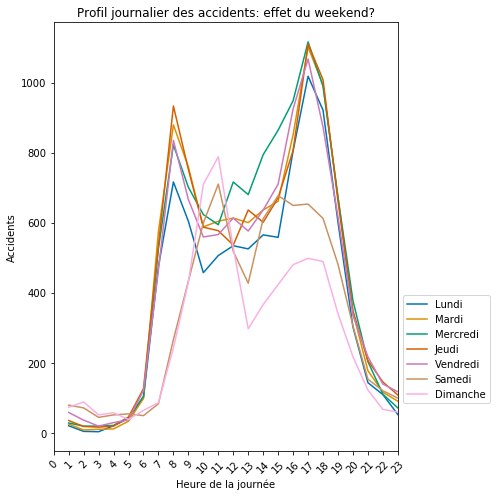

In [10]:
# Chargement des couleurs
sns.set_palette("colorblind", n_colors=7)
df_bikes['weekday'] = df_bikes.index.weekday  # Monday=0, Sunday=6

days = ['Lundi', 'Mardi', 'Mercredi',
        'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

accidents_week = df_bikes.groupby(['weekday', df_bikes.index.hour])[
    'sexe'].count().unstack(level=0)


fig, axes = plt.subplots(1, 1, figsize=(7, 7))


accidents_week.plot(ax=axes)
axes.set_ylabel("Accidents")
axes.set_xlabel("Heure de la journée")
axes.set_title(
    "Profil journalier des accidents: effet du weekend?")
axes.set_xticks(np.arange(0, 24))
axes.set_xticklabels(np.arange(0, 24), rotation=45)
# axes.set_ylim(0, 6)
axes.legend(labels=days, loc='lower left', bbox_to_anchor=(1, 0.1))

plt.tight_layout()

In [11]:
accidents_week = df_bikes.sort_values(['Time'])
# L'input est composé de toutes les données :
input = accidents_week
# L'output est composé des données de 2017 uniquement :
output = accidents_week.iloc[58561:63389:, :]

In [12]:
accidents_week = input.groupby(['weekday', input.index.hour])[
    'sexe'].count().unstack(level=0)
accidents_d = accidents_week.sum()
# Nombre d'accidents par jour de la semaine en moyenne par année :
print(accidents_d/14)
accidents_d = accidents_d/14
accidents_week_2017 = output.groupby(['weekday', output.index.hour])[
    'sexe'].count().unstack(level=0)
accidents_d_2017 = accidents_week_2017.sum()
# Nombre d'accidents par jour de la semaine en 2017 :
print(accidents_d_2017)
accident_2017 = accidents_d_2017

weekday
0    648.500000
1    746.071429
2    788.642857
3    748.500000
4    729.642857
5    553.142857
6    465.142857
dtype: float64
weekday
0    663.0
1    771.0
2    808.0
3    766.0
4    718.0
5    591.0
6    511.0
dtype: float64


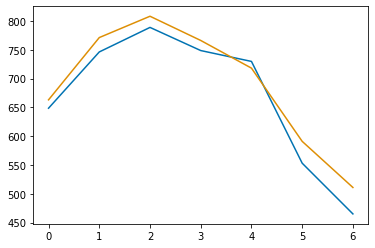

In [13]:
fig = plt.figure()
plt.plot(accidents_d)
plt.plot(accident_2017)
plt.show()

In [14]:
np.set_printoptions(threshold=sys.maxsize)

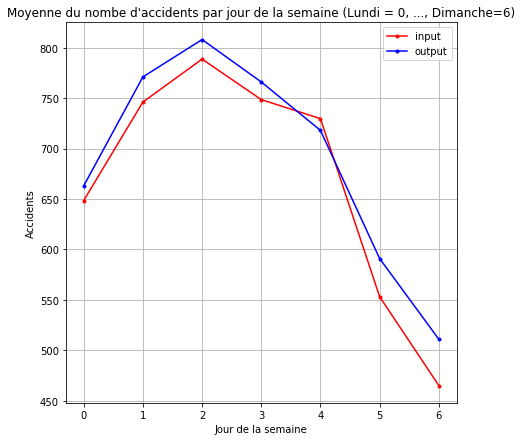

In [25]:
width = 6
raw_x = np.array(accidents_d)
raw_y = np.array(accident_2017)
# Plot de l'input et de l'output
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.plot(raw_x, "r.-", label="input")
ax.plot(raw_y, "b.-", label="output")
ax.set_xlabel("Jour de la semaine")
ax.set_ylabel("Accidents")
ax.legend()
plt.title(
    "Moyenne du nombe d'accidents par jour de la semaine (Lundi = 0, ..., Dimanche=6)")
plt.grid()

In [16]:
T = len(raw_x)
A = np.zeros((T, width))
A[0:, 0] = raw_x[0:]
for i in range(1, width):
    # On crée la matrice qui va permettre de résoudre l'équation Y=AW, avec W la matrice de coefficients du modèle
    A[i:, i] = raw_x[0:-i]
A

array([[648.5       ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [746.07142857, 648.5       ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [788.64285714, 746.07142857, 648.5       ,   0.        ,
          0.        ,   0.        ],
       [748.5       , 788.64285714, 746.07142857, 648.5       ,
          0.        ,   0.        ],
       [729.64285714, 748.5       , 788.64285714, 746.07142857,
        648.5       ,   0.        ],
       [553.14285714, 729.64285714, 748.5       , 788.64285714,
        746.07142857, 648.5       ],
       [465.14285714, 553.14285714, 729.64285714, 748.5       ,
        788.64285714, 746.07142857]])

In [17]:
# Résultat de A^-1Y=W
wop = np.dot(np.linalg.pinv(A), raw_y)

In [18]:
np.shape(wop)

(6,)

In [19]:
# Grâce aux coefficients estimés, on peut estimer Y :
y_pred = np.dot(A, wop)
y_pred

array([663.41836824, 770.48114348, 808.14133931, 765.74584859,
       717.7747921 , 593.41131494, 508.9040375 ])

Text(0.5, 1.0, "Moyenne du nombe d'accidents par jour de la semaine en 2017 (Lundi = 0, ..., Dimanche=6)")

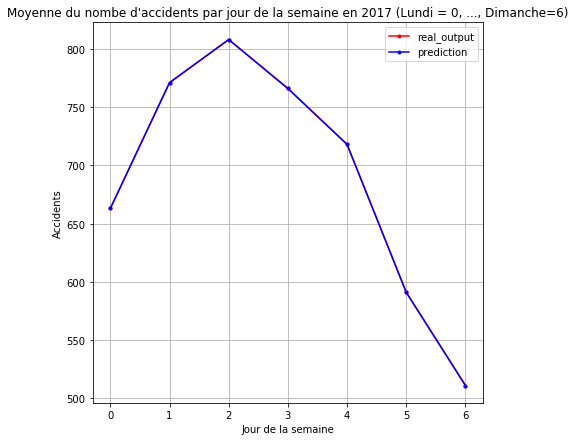

In [26]:
# Comparaison de la prédiction et de la vraie valeur de Y : avec width = 6, on obtient deux courbes quasi superposées.
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.plot(accident_2017, "r.-", label="real_output")
ax.plot(y_pred, "b.-", label="prediction")
ax.set_xlabel("Jour de la semaine")
ax.set_ylabel("Accidents")
ax.legend()
plt.grid()
plt.title("Moyenne du nombe d'accidents par jour de la semaine en 2017 (Lundi = 0, ..., Dimanche=6)")
# Les deux courbes sont presques superposées, la prédiction semble très bonne. On remarque que c'est le mercredi qui compte le plus d'accidents, peut-être car c'est un jour où les plus jeunes n'ont pas cours et sortent en vélo ? Cependant, le dimanche compte très peu d'accident, donc cette théorie semble ne pas tenir la route.

In [21]:
# Calcul de l'erreur pour différentes valeurs de witdh.
err = []
max_window = 200
raw_x = np.array(np.array(accidents_d))
raw_y = np.array(np.array(accident_2017))
T = len(raw_x)
for width in range(1, max_window+1):
    A = np.zeros((T, width))
    A[0:, 0] = raw_x[0:]
    for i in range(1, width):
        A[i:, i] = raw_x[0:-i]
    wop = np.dot(np.linalg.pinv(A), raw_y)
    y_pred = np.dot(A, wop)
    err.append(np.linalg.norm(y_pred-raw_y))
err

[51.537645176110836,
 50.0169837447238,
 49.905956188910885,
 48.904907341054944,
 46.42111753439749,
 3.284361576390827,
 1.4335364781935018e-12,
 4.4030722917880405e-13,
 4.4030722917880405e-13,
 4.4030722917880405e-13,
 4.4030722917880405e-13,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.4570111509301906e-12,
 1.

Text(0.5, 1.0, 'Erreur de prédiction en fonction de width')

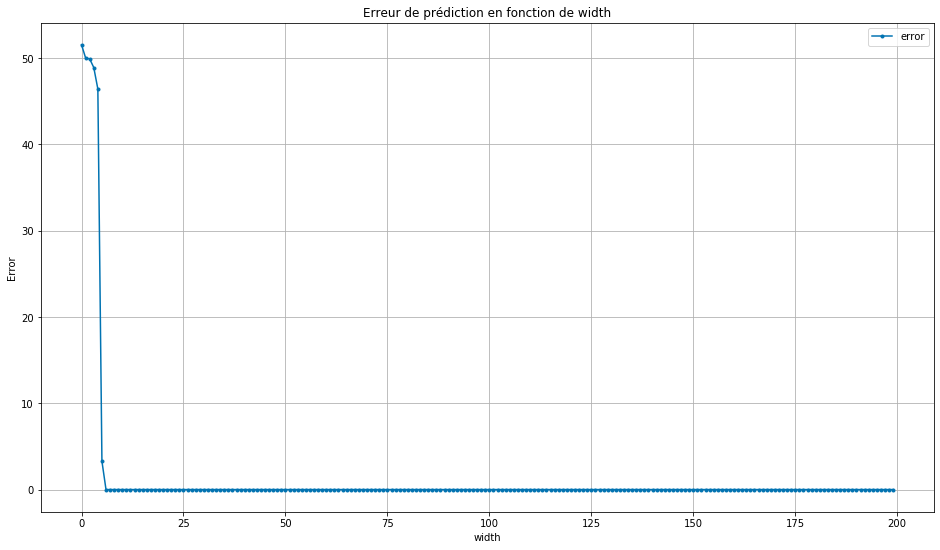

In [23]:
# Plot de l'erreur : dès width >= 6, l'erreur est faible, la prédiction sera donc très proche de la vraie valeur pour width>= 6.
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.plot(err, ".-", label="error")
ax.set_xlabel("width")
ax.set_ylabel("Error")
ax.legend()
plt.grid()
plt.title("Erreur de prédiction en fonction de width")